In [1]:
#include <TFile.h>
#include <TTree.h>
#include <TH2D.h>
#include <TCanvas.h>
#include <TF2.h>
#include <TMath.h>
#include <TString.h>

In [2]:
using::cout;
using::endl;

In [3]:
gStyle->SetOptFit(1011);

Define a toy function to fill the 2D histogram.

$z = \lambda + \mu \cos(\phi) + \nu \phi^{2} \cos(\theta)$


$\theta \in [0.0, \pi]$ and $\phi \in [-\pi, \pi]$

In [4]:
double smear(double xt)
{
    double xsmear = gRandom->Gaus(-0.5, 1.0);
    return xt + xsmear;
}

In [5]:
double pi = TMath::Pi();

In [6]:
TCanvas* can = new TCanvas("can", "can", 600, 600);

In [7]:
double weight(double lambda, double nu, double mu, double phi, double costh)
{
    return lambda + nu* cos(phi) + mu* phi* phi* costh;
}

In [8]:
TH2D* hist_true = new TH2D("hist_true", "without smearing; phi [rad]; costh", 20, -pi, pi, 20, -1.0, 1.0);
TH2D* hist_meas = new TH2D("hist_meas", "with smearing; phi [rad]; costh", 20, -pi, pi, 20, -1.0, 1.0);

In [9]:
for(int i = 0; i < 50000; i++)
{
    // true distribution
    double phi = -pi+ gRandom->Rndm()* 2.0* pi;
    double theta = 0.0 + gRandom->Rndm()* pi;
    double costh = cos(theta);
    
    double weight1 = weight(1.0, 0.2, 0.3, phi, costh);

    hist_true->Fill(phi, costh, weight1);
    
    // maearued distribution
    double meas_phi = smear(phi);
    double meas_costh = smear(costh);
    hist_meas->Fill(meas_phi, meas_costh, weight1);
}

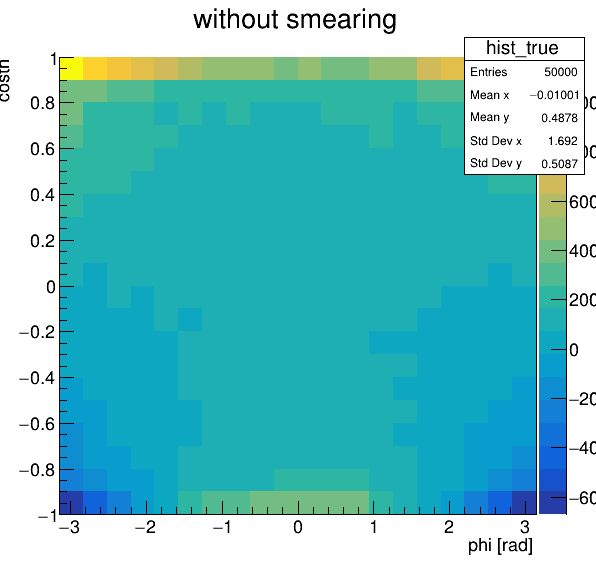

Info in <TCanvas::Print>: png file imgs/without_smearing.png has been created


In [10]:
hist_true->Draw("COLZ");
can->SaveAs("imgs/without_smearing.png");
can->Draw();

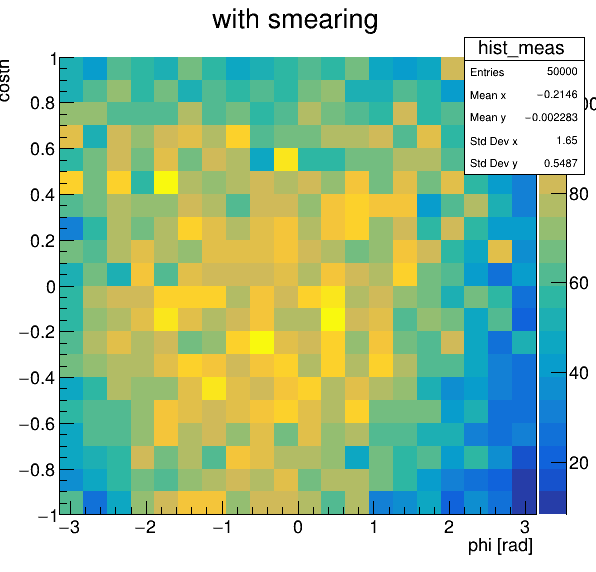

Info in <TCanvas::Print>: png file imgs/with_smearing.png has been created


In [11]:
hist_meas->Draw("COLZ");
can->SaveAs("imgs/with_smearing.png");
can->Draw();

Lets generate 60000 (20x20) histograms each containing 50000 entries with $\lambda$, $\mu$, $\mu$ in the range $[-1.0, 1.0]$.

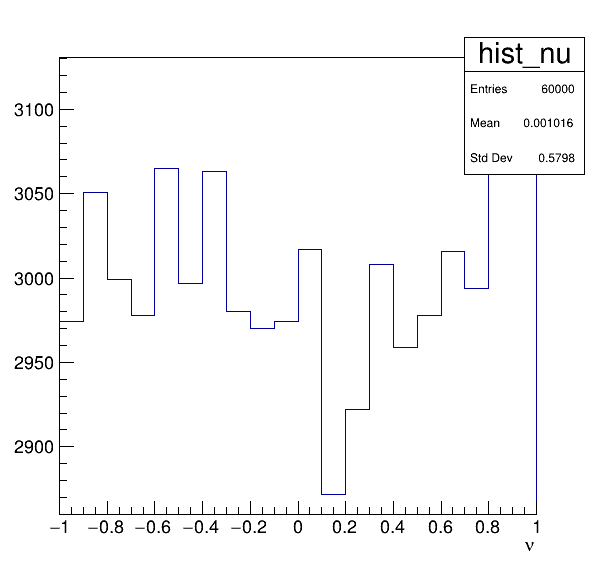

Info in <TCanvas::Print>: png file imgs/lambda.png has been created
Info in <TCanvas::Print>: png file imgs/mu.png has been created
Info in <TCanvas::Print>: png file imgs/nu.png has been created


In [12]:
TH1D* hist_lambda = new TH1D("hist_lambda", "; #lambda; ", 20, -1.0, 1.0);
TH1D* hist_mu = new TH1D("hist_mu", "; #mu; ", 20, -1.0, 1.0);
TH1D* hist_nu = new TH1D("hist_nu", "; #nu; ", 20, -1.0, 1.0);

TFile* out_file = new TFile("toy_hist.root", "RECREATE");

TH2D* hist_array[60000];

for(int i = 0; i < 60000; i++)
{
    // generate lambda, mu, nu randomly
    double lambda = -1.0 + gRandom->Rndm()* 2.0;
    double mu = -1.0 + gRandom->Rndm()* 2.0;
    double nu = -1.0 + gRandom->Rndm()* 2.0;
    
    hist_lambda->Fill(lambda);
    hist_mu->Fill(mu);
    hist_nu->Fill(nu);
    
    // name histogram as hist_lambda_nu_mu;
    
    TString hist_name = Form("hist_%f_%f_%f", lambda, mu, nu);
    
    hist_array[i] = new TH2D(hist_name.Data(), "; phi [rad]; costh", 20, -pi, pi, 20, -1.0, 1.0);
    
    for(int j = 0; j < 50000; j++)
    {
        double phi = -pi+ gRandom->Rndm()* 2.0* pi;
        double theta = 0.0 + gRandom->Rndm()* pi;
        double costh = cos(theta);
        double w1 = weight(lambda, mu, nu, phi, costh);
        
        hist_array[i]->Fill(smear(phi), smear(costh), w1);
    }
}

out_file->Write();
out_file->Close();

hist_lambda->Draw();
can->Draw();
can->SaveAs("imgs/lambda.png");


hist_mu->Draw();
can->Draw();
can->SaveAs("imgs/mu.png");

hist_nu->Draw();
can->Draw();
can->SaveAs("imgs/nu.png");

For testing use file with $\lambda, \mu, \nu = 0.7, 0.4, 0.3$

In [13]:
TFile* out_file2 = new TFile("test_toy.root", "RECREATE");

TH2D* hist[15];

for(int i = 0; i < 10; i++)
{
    TString hist_name = Form("hist_%d", i);
    hist[i] = new TH2D(hist_name, "; phi [rad]; costh", 20, -pi, pi, 20, -1.0, 1.0);
    
    for(int j = 0; j < 50000; j++)
    {
        
        // test histogram
        double phi = -pi+ gRandom->Rndm()* 2.0* pi;
        double theta = 0.0 + gRandom->Rndm()* pi;
        double costh = cos(theta);
        
        double weight1 = weight(0.7, 0.4, 0.3, phi, costh);
        hist[i]->Fill(smear(phi), smear(costh), weight1);
    }
}

out_file2->Write();
out_file2->Close();